In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# import file

dir=r".\storage\data"
train=pd.read_csv(os.path.join(dir,"train.csv"))
test=pd.read_csv(os.path.join(dir,"test.csv"))
sub_=pd.read_csv(os.path.join(dir,"sample_submission.csv"))
orig=pd.read_csv(os.path.join(dir,"loan_dataset_20000.csv"))

FileNotFoundError: [Errno 2] No such file or directory: '.\\storage\\data\\train.csv'

In [ ]:
display(train.head())
display(test.head())
display(orig.head())

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


In [4]:
# display shape
display(f"shape of train<{train.shape}>")
display(f"shape of test<{test.shape}>")
display(f"shape of orig<{orig.shape}>")

NameError: name 'train' is not defined

In [3]:
# revise orig data
orig["id"]=test.id.max()+1
test["loan_paid_back"]=0

display(f"shape of train<{train.shape}>")
display(f"shape of test<{test.shape}>")
display(f"shape of orig<{orig.shape}>")

data=pd.concat([train,test],axis=0)
display(f"shape of merged data <{data.shape}>")

NameError: name 'test' is not defined

In [30]:
# display data

CAT,NUM,TARGET=[],[],["loan_paid_back"]
for col in data.columns.drop(["id","loan_paid_back"]):
    temp="NUM"
    if data[col].dtype=="object":
        CAT.append(col)
        temp="CAT"
    else:
        NUM.append(col)
    print(f"{col:20}[{temp}] {data[col].nunique():10} catgory{data[col].isna().sum():10} NAN")
Features=train.columns.drop(["id","loan_paid_back"])

len(CAT),len(NUM),len(Features)

annual_income       [NUM]     152960 catgory         0 NAN
debt_to_income_ratio[NUM]        572 catgory         0 NAN
credit_score        [NUM]        406 catgory         0 NAN
loan_amount         [NUM]     139138 catgory         0 NAN
interest_rate       [NUM]       1498 catgory         0 NAN
gender              [CAT]          3 catgory         0 NAN
marital_status      [CAT]          4 catgory         0 NAN
education_level     [CAT]          5 catgory         0 NAN
employment_status   [CAT]          5 catgory         0 NAN
loan_purpose        [CAT]          8 catgory         0 NAN
grade_subgrade      [CAT]         30 catgory         0 NAN


(6, 5, 11)

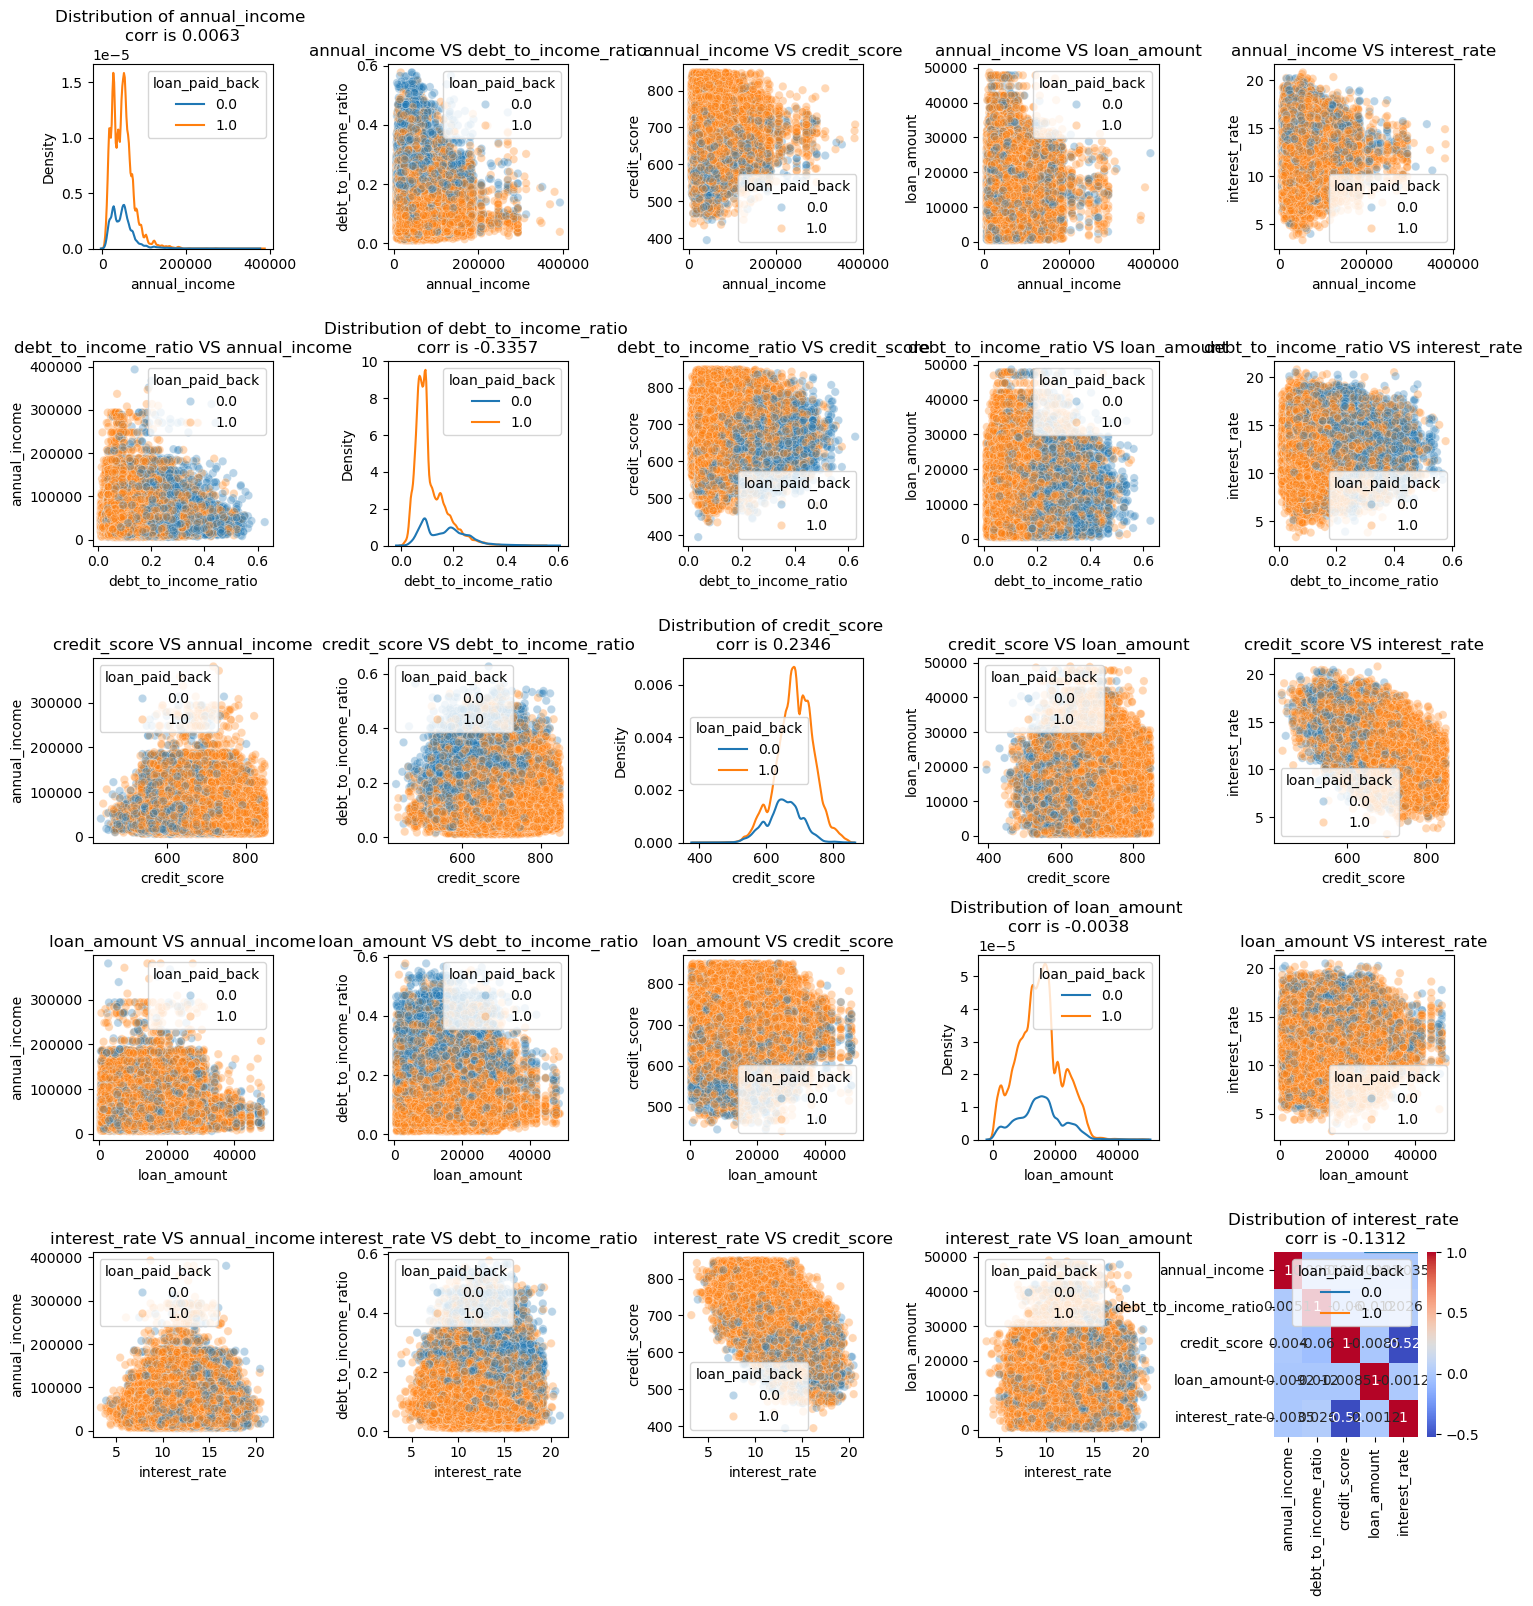

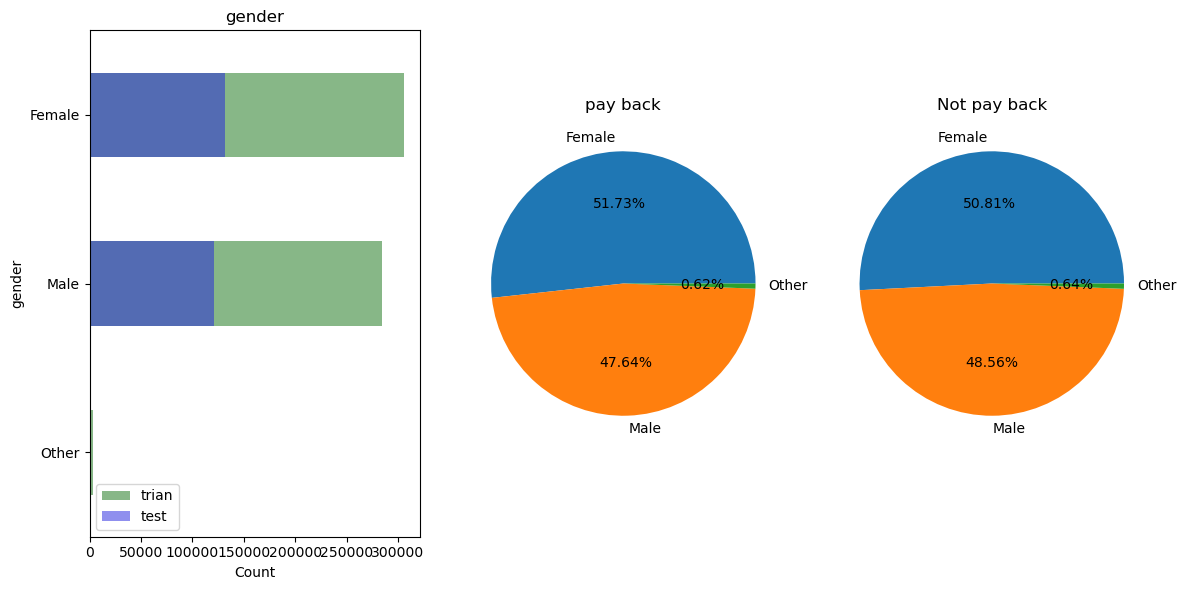

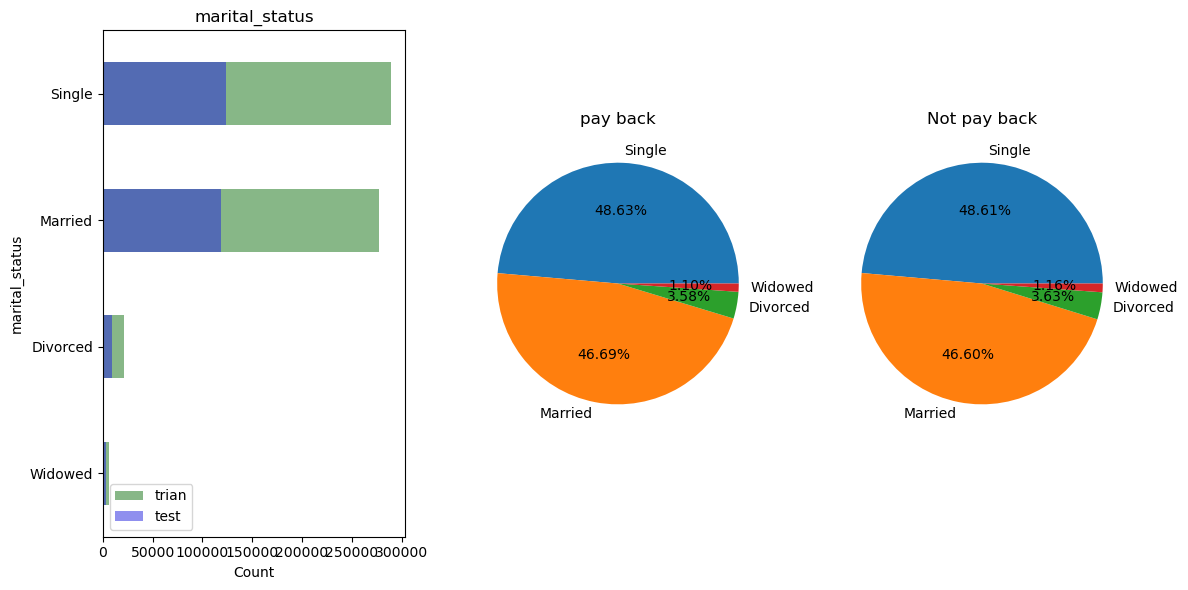

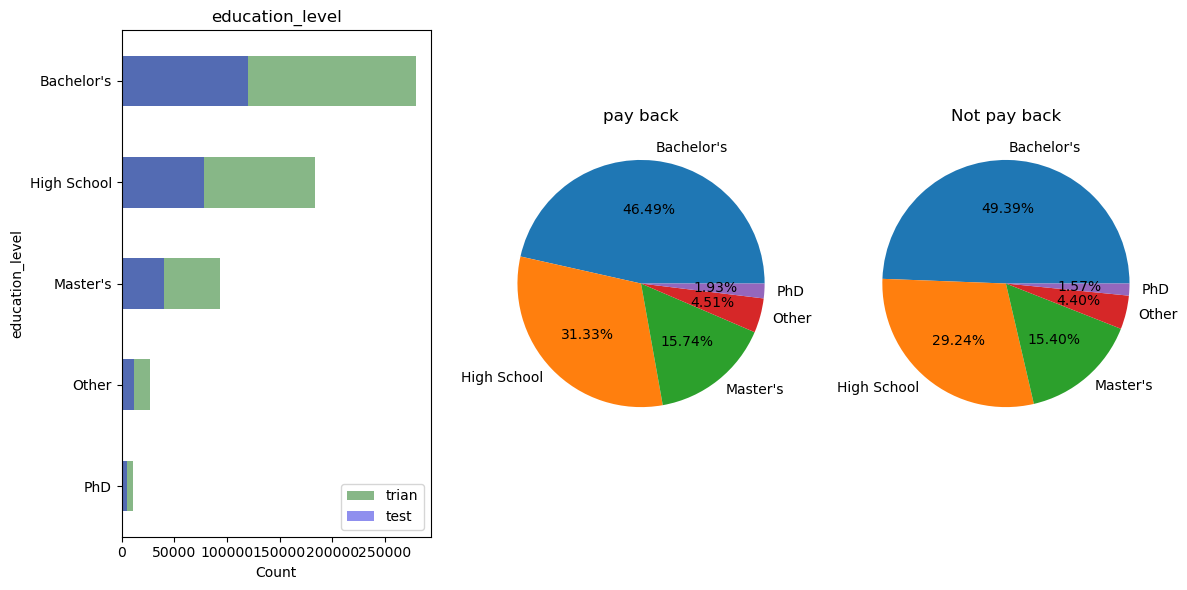

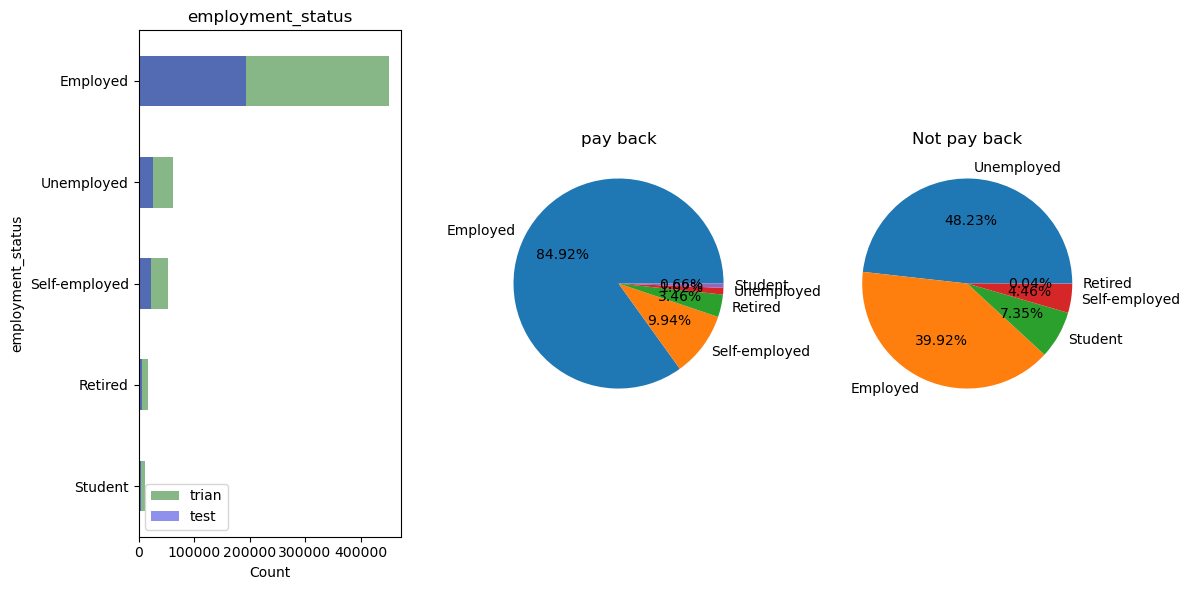

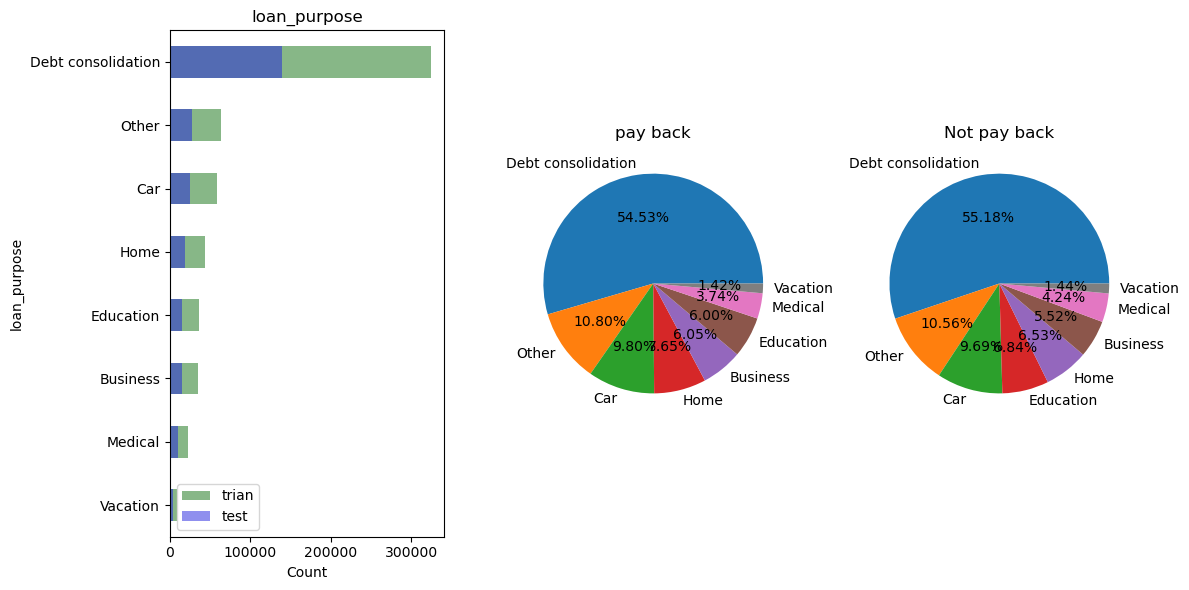

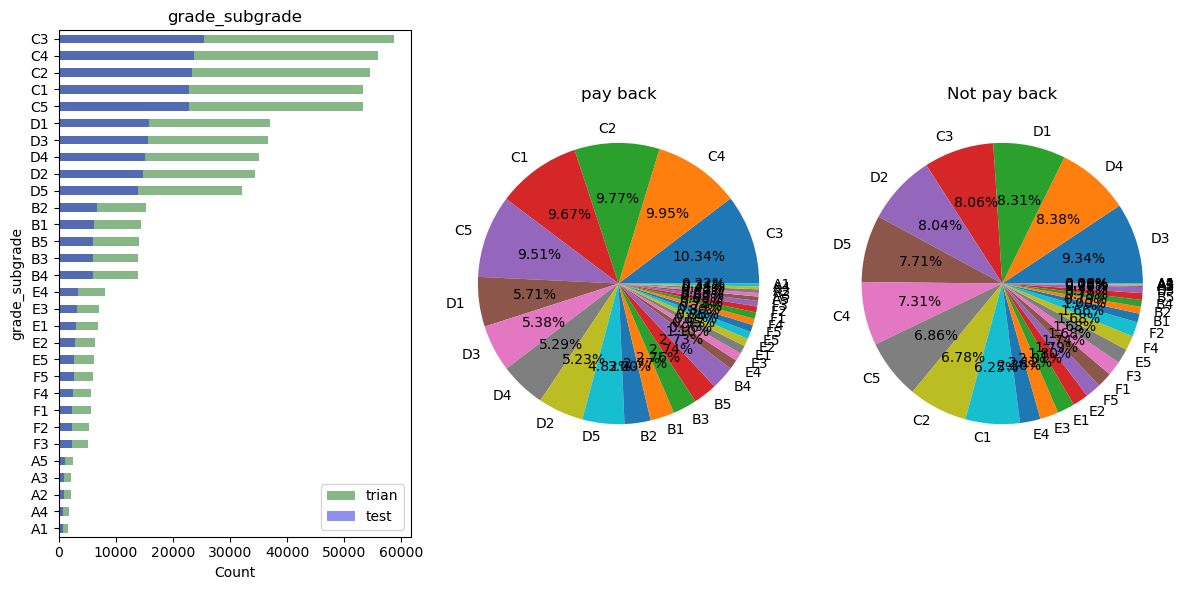

In [20]:
# display  the distributions of train\test\orig
# < 1 > analysis of object features
for cat_features in CAT:
    plt.figure(figsize=(12,6))

    plt.subplot(131)
    sns.countplot(train[cat_features],order=train[cat_features].value_counts().index,\
                  label="trian",color="g",alpha=0.5,width=0.5)
    sns.countplot(test[cat_features],order=test[cat_features].value_counts().index,\
                  label="test",color="b",alpha=0.5,width=0.5)
    plt.title(cat_features)
    plt.legend()
    plt.xlabel("Count")

    plt.subplot(132)
    counts=train[train["loan_paid_back"]==1][cat_features].value_counts(normalize=True)
    plt.pie(counts,labels=counts.index,autopct="%.2f%%")
    plt.title("pay back")

    plt.subplot(133)
    counts=train[train["loan_paid_back"]==0][cat_features].value_counts(normalize=True)
    plt.pie(counts,labels=counts.index,autopct="%.2f%%")
    plt.title("Not pay back")
    
    plt.tight_layout()
    plt.show()

Chart Analysis:

1. employment_status seems to have great value
2. train and test seems to have same distributions

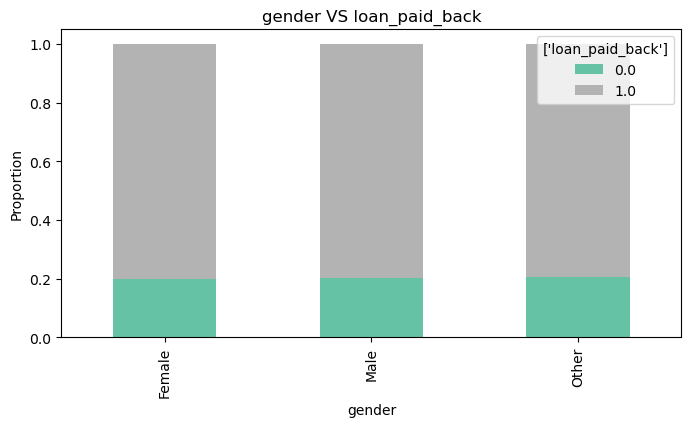

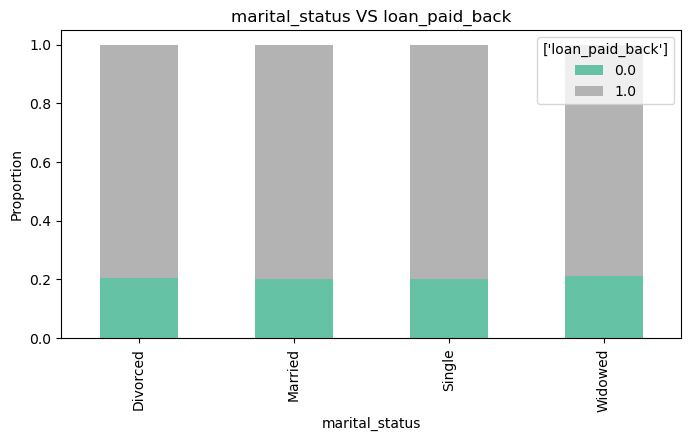

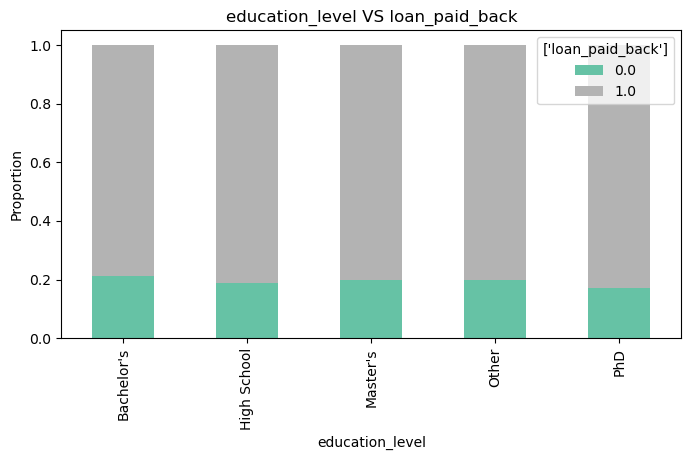

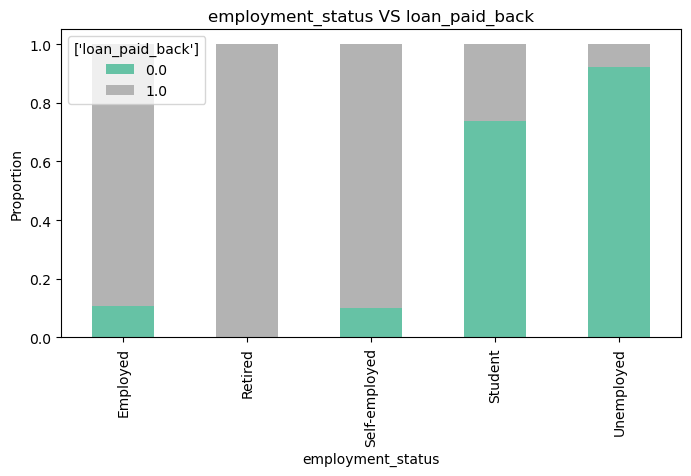

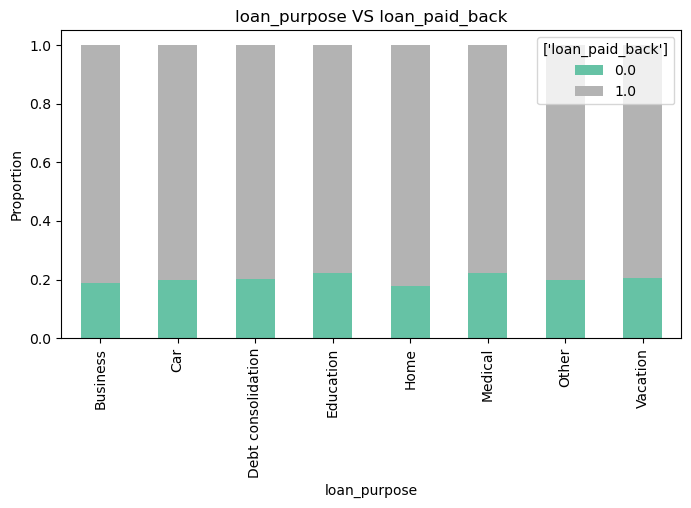

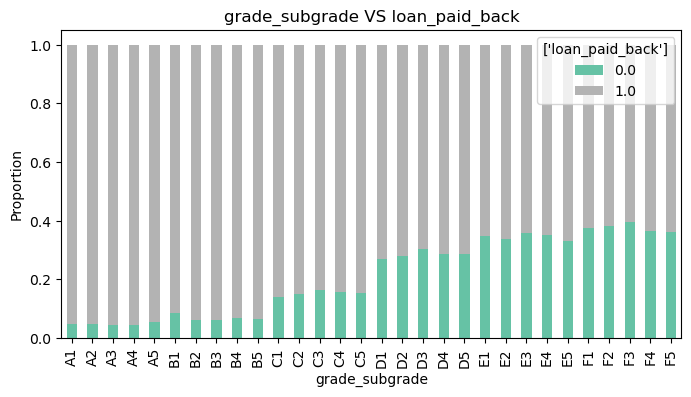

In [89]:
# display relations of between object features and target

for col in CAT:
    prop=train.groupby(col)[TARGET].value_counts(normalize=True).unstack(fill_value=0)
    prop.plot(kind="bar",stacked=True,figsize=(8,4),colormap="Set2")
    plt.title(f"{col} VS {TARGET[0]}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.legend(title=TARGET)
    plt.show()

Chart Analysis:

1. < employment_status > Retired and Self-employment and Employed are more inclined to repay,that's are easy to understand because they have steady source of money.Student and Unemployed are inclined to not to repay.So,we can establish a Feature "is_stu_or_unemployed" to distinguish them.
2. < grade_subgrade > There is a roughly linear relationship between credit rating and loan repayment; that is, the lower the rating, the more likely the borrower is to default on their loan.

In [191]:
len(CAT)

6

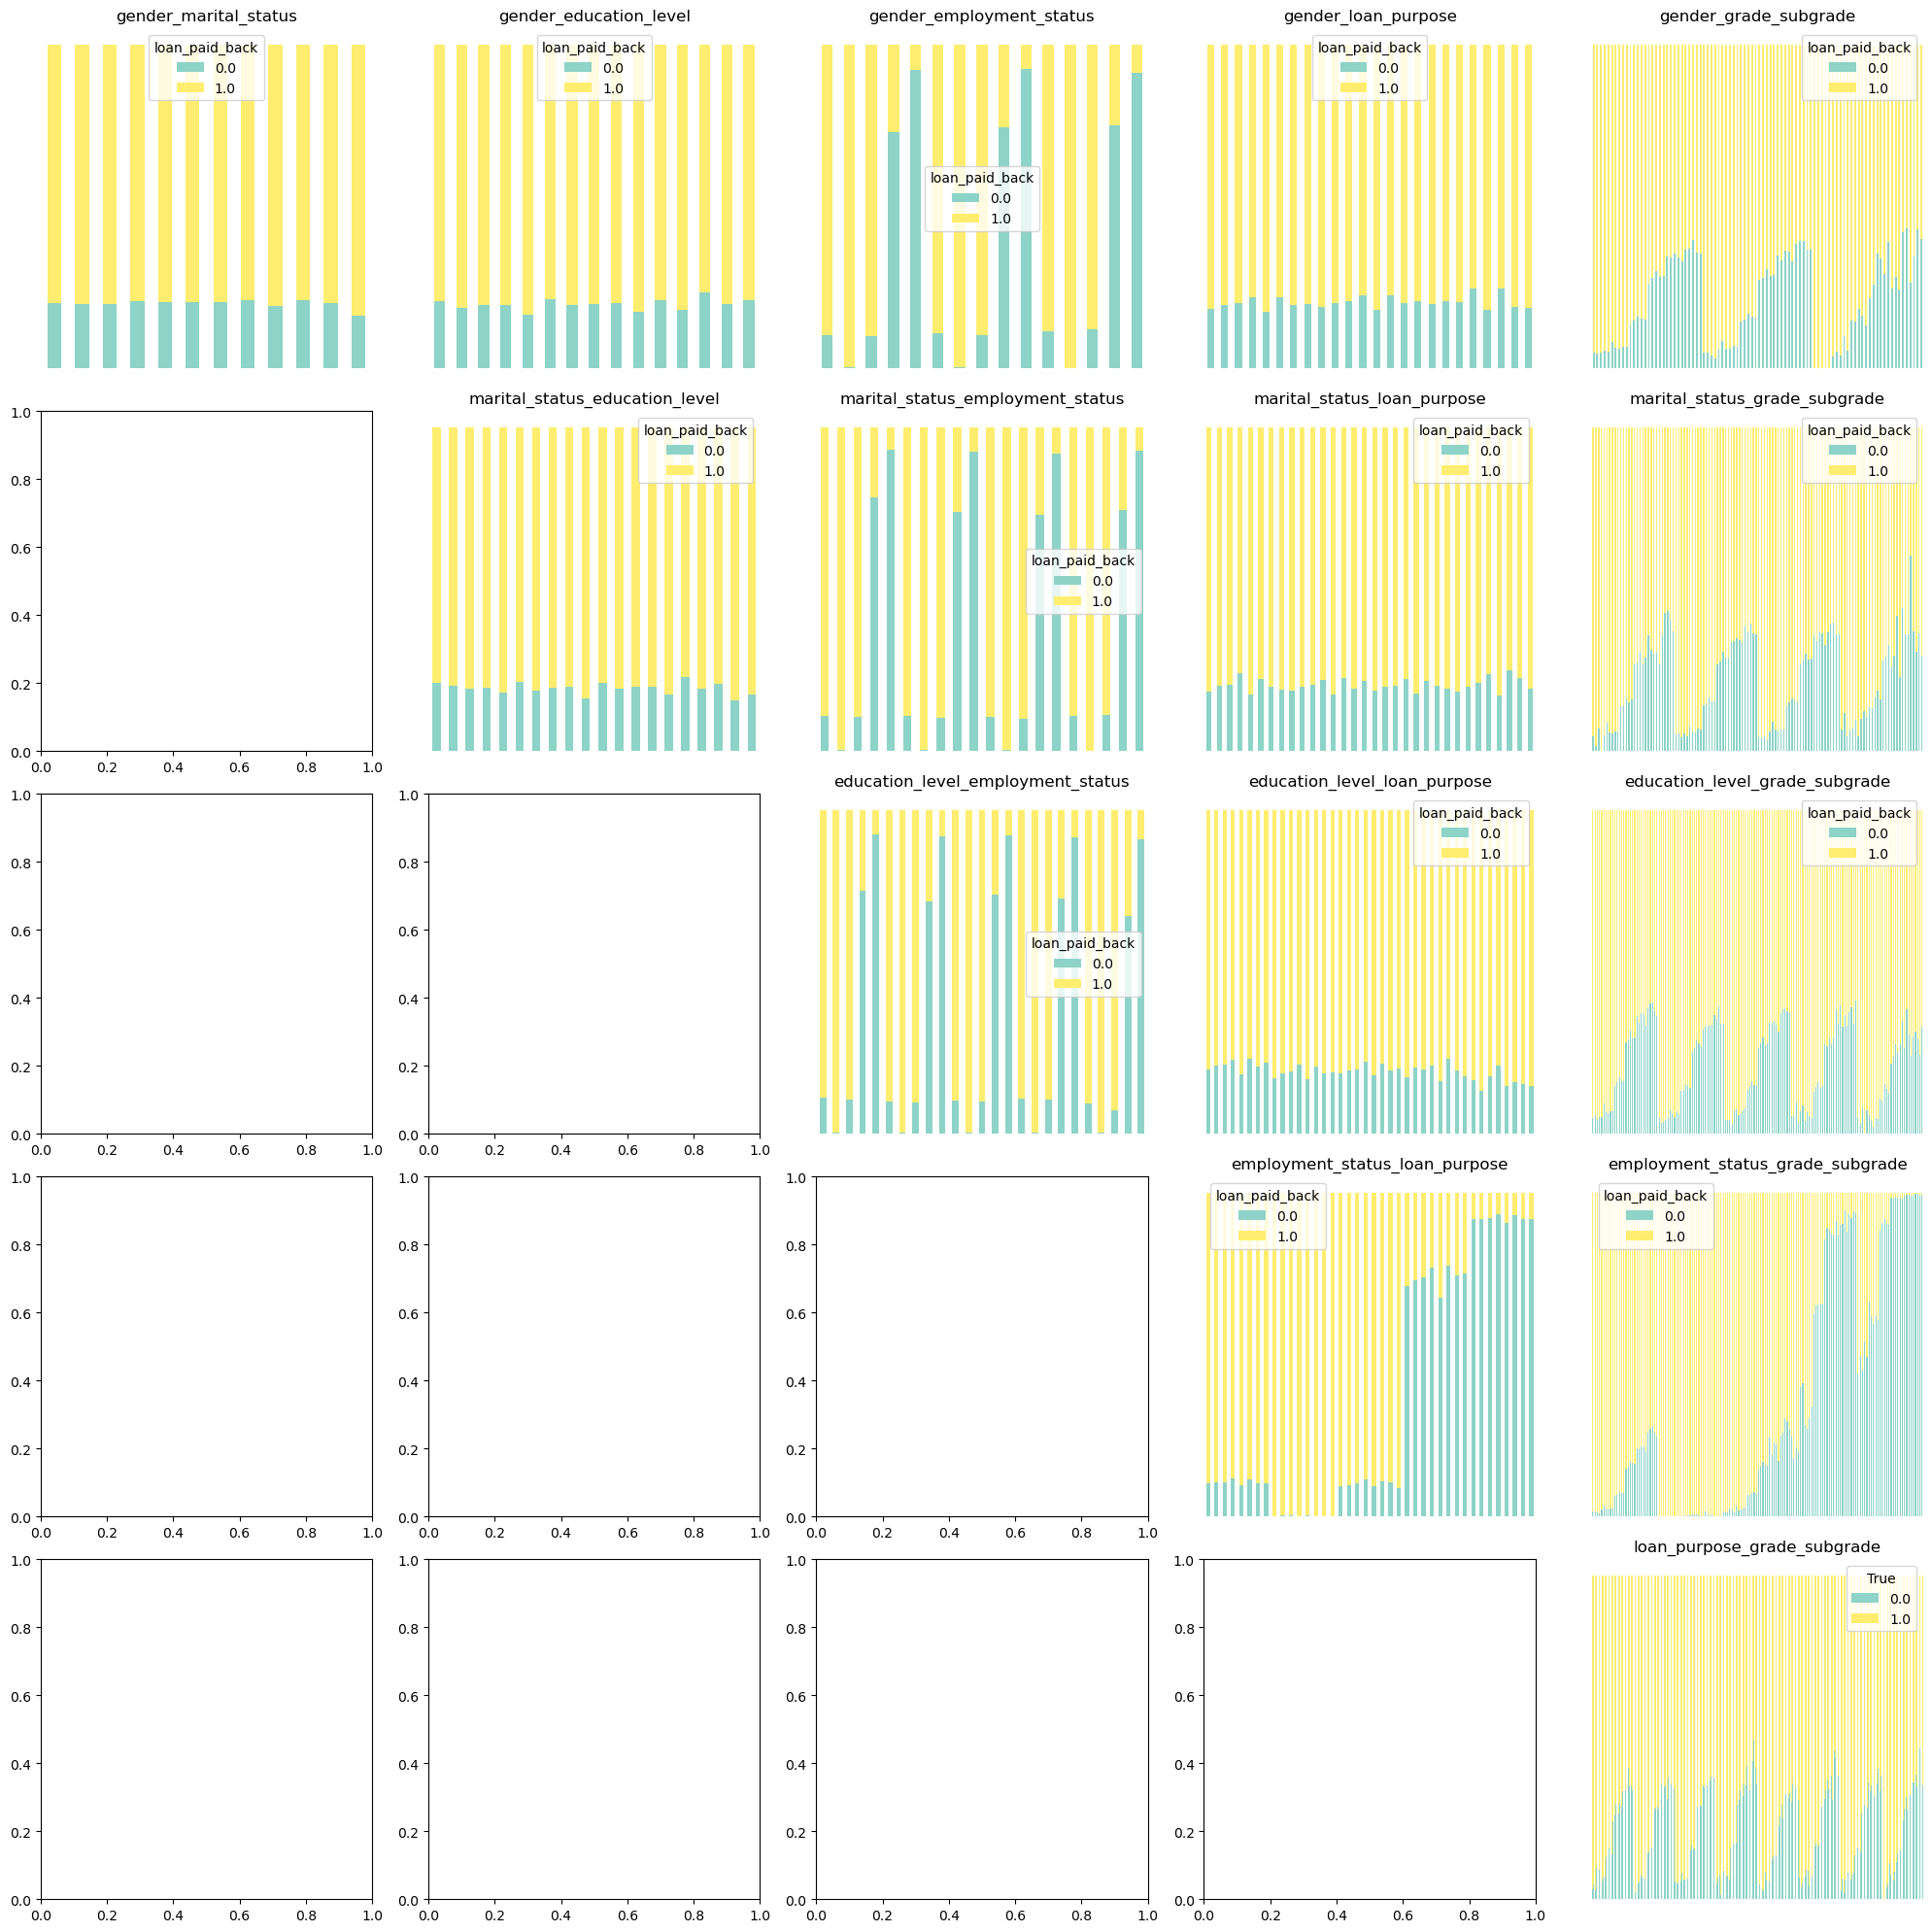

In [190]:
temp=train.copy()
_,axes=plt.subplots(nrows=5,ncols=5,figsize=(20,20))

for i in range(len(CAT)):
    for j in range(len(CAT)):
        if i>=j: continue
        name=CAT[i]+"_"+CAT[j]
        temp[name]=temp[CAT[i]]+"_"+temp[CAT[j]]

        prop=temp.groupby(name)[TARGET].value_counts(normalize=True).unstack(fill_value=0)
        prop.plot(kind="bar",stacked=True,ax=axes[i,j-1],colormap="Set3")
        axes[i,j-1].set_title(name)
        axes[i,j-1].axis("off")
plt.legend(title=True)
plt.tight_layout()
plt.show()
            
            

Chart Analysis

**This graph needs to be compared with the single numerical feature distribution graph above, mainly to observe whether their trends are consistent.**

1. "employment_Status" and  "loan_purpose" .Compared to a single feature distribution, the combination of the two yielded special results.
2. "employment_status" and "grade_subgrade" .Compared to a single feature distribution, the combination of the two yielded special results.

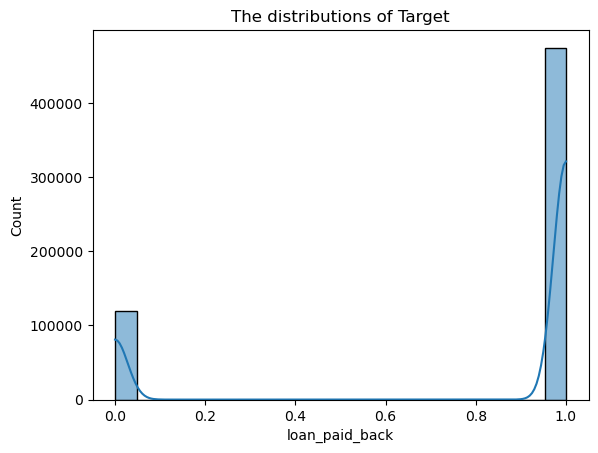

In [193]:
sns.histplot(x="loan_paid_back",kde=True,data=train)
plt.title("The distributions of Target")
plt.show()

Chart Analysis:

1. The target values are imbalanced, so we need to use a stratified partitioning strategy when performing cross-validation (CV).

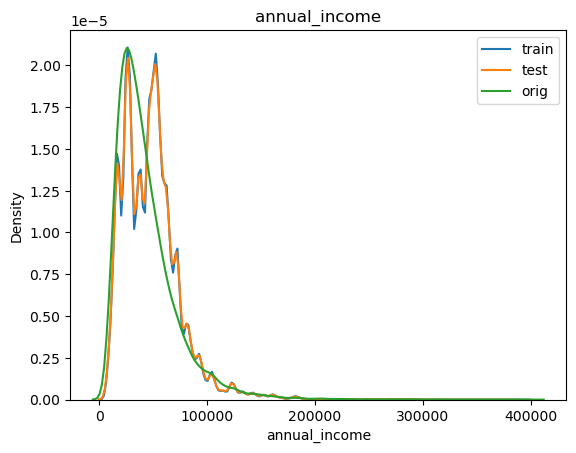

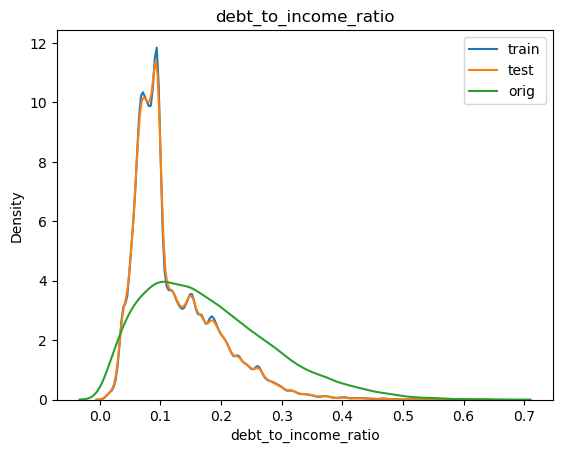

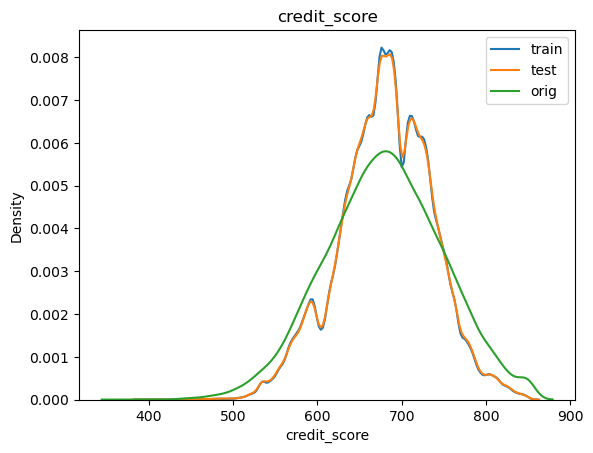

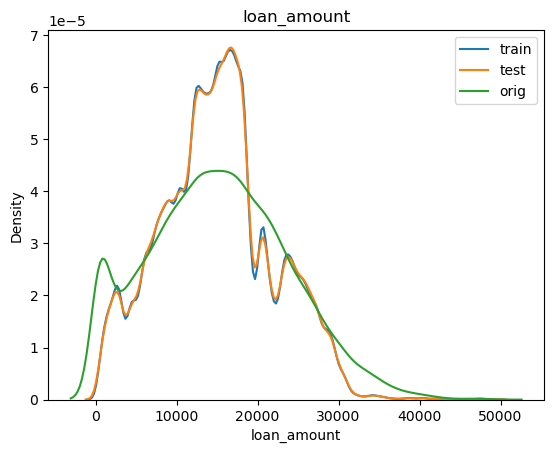

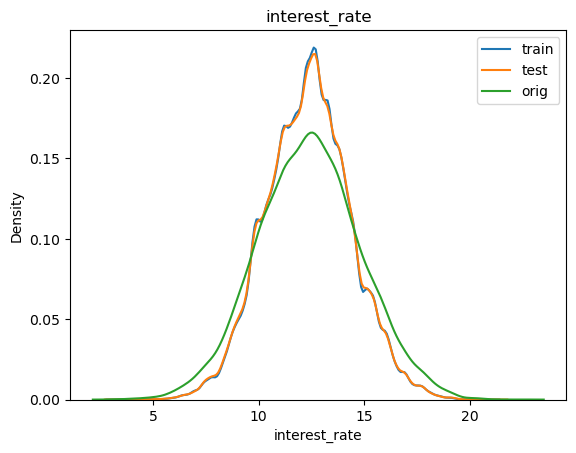

In [192]:
for col in NUM:
    sns.kdeplot(x=col,data=train,fill=False,label="train")
    sns.kdeplot(x=col,data=test,fill=False,label="test")
    sns.kdeplot(x=col,data=orig,fill=False,label="orig")
    plt.legend()
    plt.title(col)
    plt.show()

In [9]:
# < 2 > analysis of numeric features
from tqdm.notebook import tqdm
# import matplotlib
# matplotlib.use("Agg")
pbar=tqdm(desc="bar",total=len(NUM)**2)

_,axes=plt.subplots(nrows=len(NUM),ncols=len(NUM),figsize=(15,15))

for i in range(len(NUM)):
    for j in range(len(NUM)):
        pbar.update(1)
        ax_=axes[i,j]
        if i==j:
            sns.kdeplot(x=NUM[i],hue="loan_paid_back",data=train.sample(20_0000),ax=ax_,fill=False)
            corr=train[NUM[i]].corr(train["loan_paid_back"])
            ax_.set_title(f"Distribution of {NUM[i]} \ncorr is {corr:.4f}")
        else:
            sns.scatterplot(x=NUM[i],y=NUM[j],hue="loan_paid_back",data=train.sample(20_0000),ax=ax_,alpha=0.3)
            ax_.set_title(f"{NUM[i]} VS {NUM[j]}")
print("Rendering the interface (which takes a relatively long time)")
plt.tight_layout()
plt.show()
pbar.close()

bar:   0%|          | 0/25 [00:00<?, ?it/s]

temp
temp
temp


<Axes: >

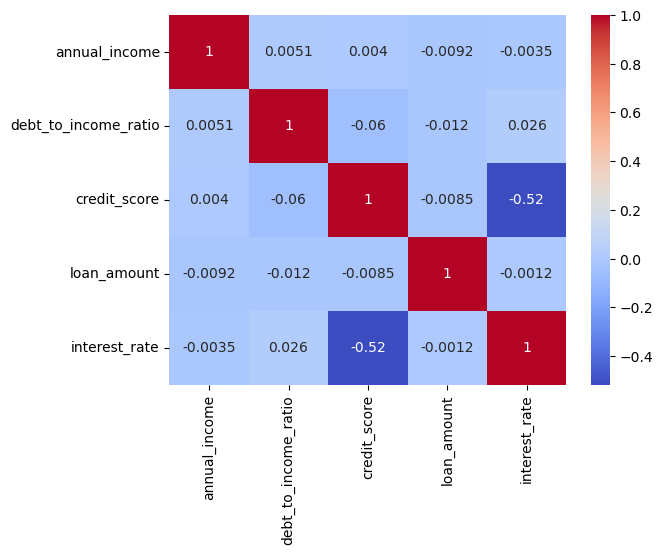

In [22]:
metrix=train[NUM].corr(method="spearman")
sns.heatmap(metrix,annot=True,cmap="coolwarm")

# analysis original data


In [140]:
display(orig.head())
display(f"the shape of original data {orig.shape}")

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back,id
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,581.88,B5,7,40833.47,24302.07,1,0,1,1,848563
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,573.17,F1,5,27968.01,10803.01,1,0,3,1,848563
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,76.32,B4,2,15502.25,4505.44,0,0,0,1,848563
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,468.07,A5,7,18157.79,5525.63,4,0,5,1,848563
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,395.50,D5,1,17467.56,3593.91,2,0,2,1,848563


'the shape of original data (20000, 23)'

In [141]:
# display data

CAT_O,NUM_O,TARGET_O=[],[],["loan_paid_back"]
for col in orig.columns.drop(["id","loan_paid_back"]):
    temp="NUM"
    if orig[col].dtype=="object":
        CAT_O.append(col)
        temp="CAT"
    else:
        NUM_O.append(col)
    print(f"{col:20}[{temp}] {orig[col].nunique():10} catgory{orig[col].isna().sum():10} NAN")

len(CAT_O),len(NUM_O),len(TARGET_O)

age                 [NUM]         55 catgory         0 NAN
gender              [CAT]          3 catgory         0 NAN
marital_status      [CAT]          4 catgory         0 NAN
education_level     [CAT]          5 catgory         0 NAN
annual_income       [NUM]      19947 catgory         0 NAN
monthly_income      [NUM]      19636 catgory         0 NAN
employment_status   [CAT]          5 catgory         0 NAN
debt_to_income_ratio[NUM]        555 catgory         0 NAN
credit_score        [NUM]        399 catgory         0 NAN
loan_amount         [NUM]      18819 catgory         0 NAN
loan_purpose        [CAT]          8 catgory         0 NAN
interest_rate       [NUM]       1365 catgory         0 NAN
loan_term           [NUM]          2 catgory         0 NAN
installment         [NUM]      17464 catgory         0 NAN
grade_subgrade      [CAT]         30 catgory         0 NAN
num_of_open_accounts[NUM]         16 catgory         0 NAN
total_credit_limit  [NUM]      19973 catgory         0 N

(6, 15, 1)

In [142]:
train.columns.drop(["id","loan_paid_back"])

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose', 'grade_subgrade'],
      dtype='object')

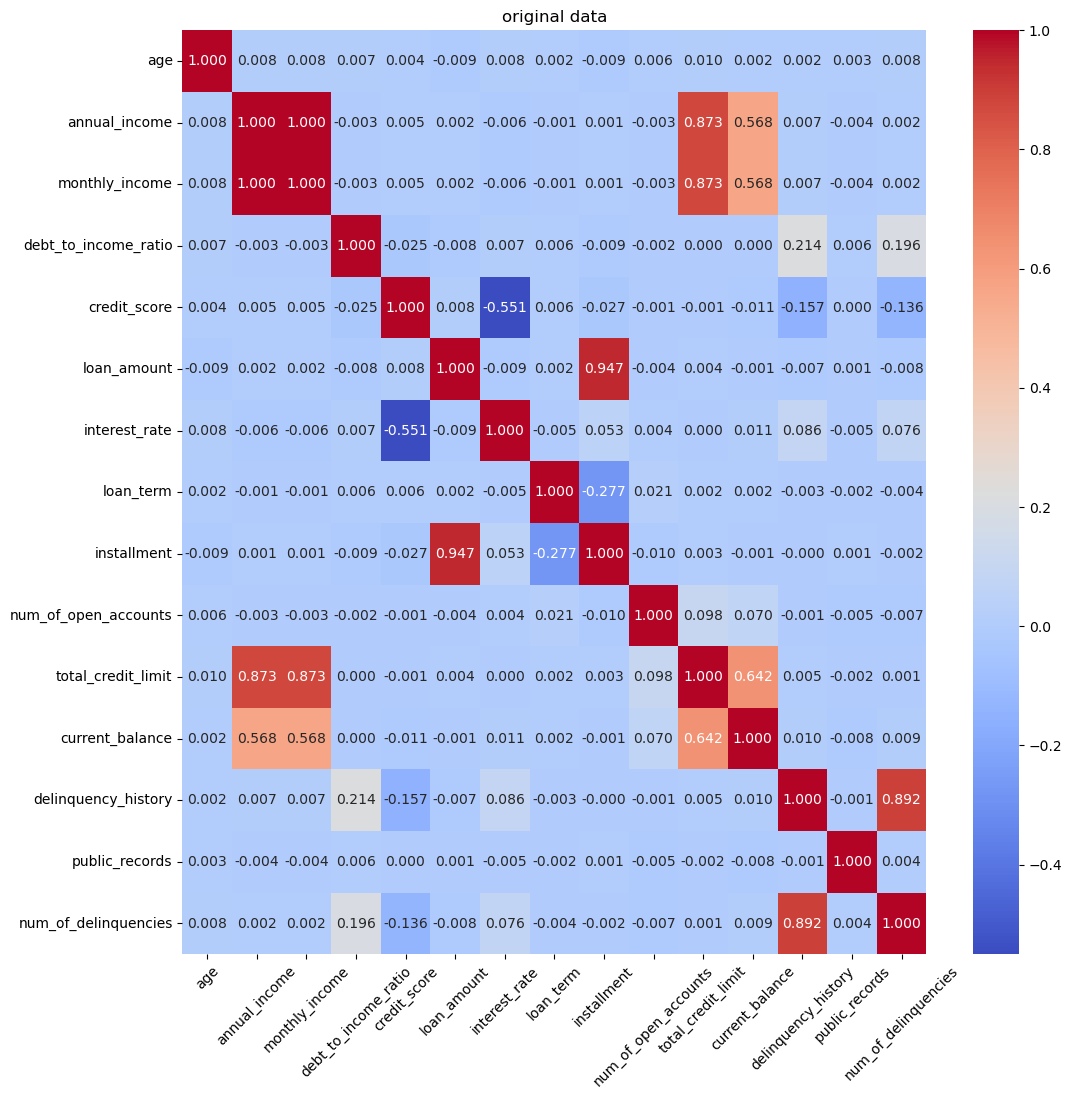

In [143]:
metrix=orig[NUM_O].corr(method="spearman")
plt.figure(figsize=(12,12))
sns.heatmap(metrix,annot=True,cmap="coolwarm",fmt=".3f")
plt.xticks(rotation=45)
plt.title("original data")
plt.show()

Chart Analysis:

1. there is a strong relation linear relationship between **"total_credit_limit"** and  **"current_balance"** and **"annual_income"**(Training set exists)
2. there is a slightly weak relationship between **num_of_delinquencies** and **delinquency_history** and **debt_to_income_ratio**(Training set exists)
3. there is a strong relation linear relationship between **"installment"** and  **"loan_aount"** (Training set exists)

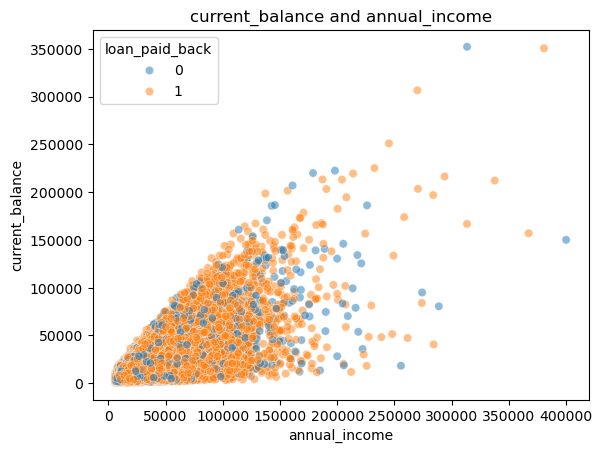

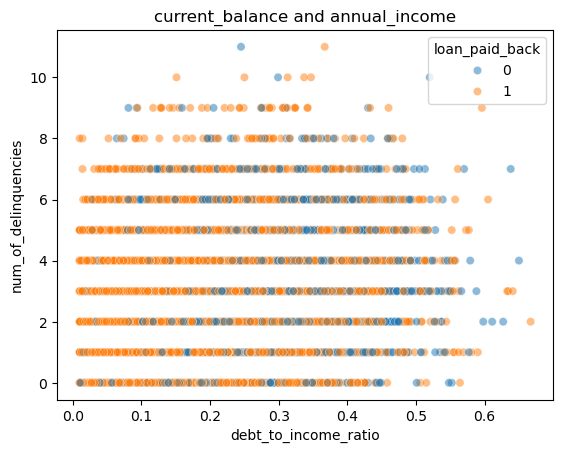

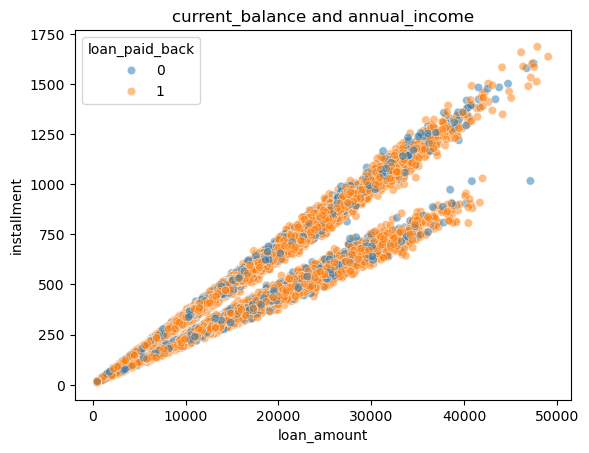

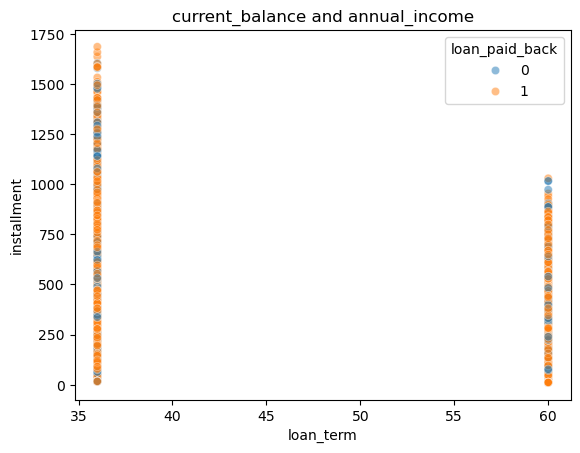

In [166]:
# current_balance and annual_income
sns.scatterplot(y="current_balance",x="annual_income",hue="loan_paid_back",data=orig,palette="tab10",alpha=0.5)
plt.title("current_balance and annual_income")
plt.show()

sns.scatterplot(y="num_of_delinquencies",x="debt_to_income_ratio",hue="loan_paid_back",data=orig,palette="tab10",alpha=0.5)
plt.title("current_balance and annual_income")
plt.show()

sns.scatterplot(y="installment",x="loan_amount",hue="loan_paid_back",data=orig,palette="tab10",alpha=0.5)
plt.title("current_balance and annual_income")
plt.show()

sns.scatterplot(y="installment",x="loan_term",hue="loan_paid_back",data=orig,palette="tab10",alpha=0.5)
plt.title("current_balance and annual_income")
plt.show()